In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df_fund=pd.read_csv("ks-projects-201801.csv")


display(df_fund)
#category,period(deadline - launched),goal,backersが必要そう
df_fund.info()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [3]:
df_fund2 = df_fund.drop(columns=['ID','name','currency','country','usd pledged','usd_pledged_real','usd_goal_real'])
df_fund2 = df_fund2[df_fund2['state'] != 'canceled']
#stateがcanceledのものを除外

df_fund2['state']=df_fund2['state'] == 'successful'
#stateのuccessfulをTrueに、failedをFalseに変換

df_fund2

,category,main_category,deadline,goal,launched,pledged,state,backers
0,Poetry,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0
1,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15
2,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3
3,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1
5,Restaurants,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,True,224
...,...,...,...,...,...,...,...,...
378654,Small Batch,Food,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,False,4
378657,Narrative Film,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,False,5
378658,Narrative Film,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,False,1
378659,Technology,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,False,6


In [4]:
#periodの作成
df_fund2['period'] = 0

#deadlineからlaunchedを引いた数をperiodに代入


df_fund2

,category,main_category,deadline,goal,launched,pledged,state,backers,period
0,Poetry,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,0
1,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,0
2,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,0
3,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,0
5,Restaurants,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,True,224,0
...,...,...,...,...,...,...,...,...,...
378654,Small Batch,Food,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,False,4,0
378657,Narrative Film,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,False,5,0
378658,Narrative Film,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,False,1,0
378659,Technology,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,False,6,0


In [5]:
df_fund2['category'].value_counts()

Product Design     19107
Music              14999
Documentary        14597
Tabletop Games     11886
Shorts             11448
                   ...  
Residencies           68
Letterpress           48
Chiptune              33
Literary Spaces       23
Taxidermy             12
Name: category, Length: 159, dtype: int64

In [6]:
df_fund2['main_category'].value_counts()

Film & Video    57830
Music           48613
Publishing      36272
Games           29029
Technology      27854
Art             25931
Design          25918
Food            22391
Fashion         20166
Theater         10305
Comics           9977
Photography      9793
Crafts           7966
Journalism       4232
Dance            3605
Name: main_category, dtype: int64

In [7]:
#categoryの削除
df_fund2 = df_fund2.drop(columns="category")


df_fund2

,main_category,deadline,goal,launched,pledged,state,backers,period
0,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,0
1,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,0
2,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,0
3,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,0
5,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,True,224,0
...,...,...,...,...,...,...,...,...
378654,Food,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,False,4,0
378657,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,False,5,0
378658,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,False,1,0
378659,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,False,6,0


In [8]:
print(type(df_fund2['deadline']))

<class 'pandas.core.series.Series'>


In [9]:
#main_categoryの名前を数字に変換
values = df_fund2['main_category'].unique()
i=0
for value in values:
    if type(value) != int:
        df_fund2['main_category'] = df_fund2['main_category'].replace(value,i)
        i+=1
    else:
        continue
                        
df_fund2['main_category'].value_counts()

1     57830
2     48613
0     36272
5     29029
12    27854
10    25931
6     25918
3     22391
8     20166
9     10305
7      9977
11     9793
4      7966
14     4232
13     3605
Name: main_category, dtype: int64

In [10]:
df_fund2

,main_category,deadline,goal,launched,pledged,state,backers,period
0,0,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,0
1,1,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,0
2,1,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,0
3,2,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,0
5,3,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,True,224,0
...,...,...,...,...,...,...,...,...
378654,3,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,False,4,0
378657,1,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,False,5,0
378658,1,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,False,1,0
378659,12,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,False,6,0


In [ ]:
#deadlineを一律その日の24時までに設定
values = df_fund2['deadline'].unique()
for value in values:
    df_fund2['deadline'] = df_fund2['deadline'].replace(values,values+" "+"23:59:59")
    
    
#なぜか無限ループしてたっぽい

In [13]:
df_fund2

,main_category,deadline,goal,launched,pledged,state,backers,period
0,0,2015-10-09 23:59:59,1000.0,2015-08-11 12:12:28,0.0,False,0,0
1,1,2017-11-01 23:59:59,30000.0,2017-09-02 04:43:57,2421.0,False,15,0
2,1,2013-02-26 23:59:59,45000.0,2013-01-12 00:20:50,220.0,False,3,0
3,2,2012-04-16 23:59:59,5000.0,2012-03-17 03:24:11,1.0,False,1,0
5,3,2016-04-01 23:59:59,50000.0,2016-02-26 13:38:27,52375.0,True,224,0
...,...,...,...,...,...,...,...,...
378654,3,2017-04-19 23:59:59,6500.0,2017-03-20 22:08:22,154.0,False,4,0
378657,1,2011-07-19 23:59:59,1500.0,2011-06-22 03:35:14,155.0,False,5,0
378658,1,2010-08-16 23:59:59,15000.0,2010-07-01 19:40:30,20.0,False,1,0
378659,12,2016-02-13 23:59:59,15000.0,2016-01-13 18:13:53,200.0,False,6,0


In [14]:
print(type(df_fund2['deadline']))
print(type(df_fund2['launched']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
#periodに代入していく

#時間の計算をするためにdeadlineとlaunchedを時系列データに変換
df_fund2['deadline'] = pd.to_datetime(df_fund2['deadline'])
df_fund2['launched'] = pd.to_datetime(df_fund2['launched'])


#差をとる
df_fund2['period']=df_fund2['deadline']-df_fund2['launched'] 

df_fund2

,main_category,deadline,goal,launched,pledged,state,backers,period
0,0,2015-10-09 23:59:59,1000.0,2015-08-11 12:12:28,0.0,False,0,59 days 11:47:31
1,1,2017-11-01 23:59:59,30000.0,2017-09-02 04:43:57,2421.0,False,15,60 days 19:16:02
2,1,2013-02-26 23:59:59,45000.0,2013-01-12 00:20:50,220.0,False,3,45 days 23:39:09
3,2,2012-04-16 23:59:59,5000.0,2012-03-17 03:24:11,1.0,False,1,30 days 20:35:48
5,3,2016-04-01 23:59:59,50000.0,2016-02-26 13:38:27,52375.0,True,224,35 days 10:21:32
...,...,...,...,...,...,...,...,...
378654,3,2017-04-19 23:59:59,6500.0,2017-03-20 22:08:22,154.0,False,4,30 days 01:51:37
378657,1,2011-07-19 23:59:59,1500.0,2011-06-22 03:35:14,155.0,False,5,27 days 20:24:45
378658,1,2010-08-16 23:59:59,15000.0,2010-07-01 19:40:30,20.0,False,1,46 days 04:19:29
378659,12,2016-02-13 23:59:59,15000.0,2016-01-13 18:13:53,200.0,False,6,31 days 05:46:06


In [16]:
#いらなくなったdeadlineとlaunchedの消去
df_fund2 = df_fund2.drop(columns=['deadline','launched'])

df_fund2

,main_category,goal,pledged,state,backers,period
0,0,1000.0,0.0,False,0,59 days 11:47:31
1,1,30000.0,2421.0,False,15,60 days 19:16:02
2,1,45000.0,220.0,False,3,45 days 23:39:09
3,2,5000.0,1.0,False,1,30 days 20:35:48
5,3,50000.0,52375.0,True,224,35 days 10:21:32
...,...,...,...,...,...,...
378654,3,6500.0,154.0,False,4,30 days 01:51:37
378657,1,1500.0,155.0,False,5,27 days 20:24:45
378658,1,15000.0,20.0,False,1,46 days 04:19:29
378659,12,15000.0,200.0,False,6,31 days 05:46:06


In [17]:
#時系列データを秒単位に揃える

df_fund2['period']=[i.total_seconds() for i in df_fund2.period]


df_fund2

,main_category,goal,pledged,state,backers,period
0,0,1000.0,0.0,False,0,5140051.0
1,1,30000.0,2421.0,False,15,5253362.0
2,1,45000.0,220.0,False,3,3973149.0
3,2,5000.0,1.0,False,1,2666148.0
5,3,50000.0,52375.0,True,224,3061292.0
...,...,...,...,...,...,...
378654,3,6500.0,154.0,False,4,2598697.0
378657,1,1500.0,155.0,False,5,2406285.0
378658,1,15000.0,20.0,False,1,3989969.0
378659,12,15000.0,200.0,False,6,2699166.0


In [18]:
y = df_fund2["state"].values
X = df_fund2[["main_category", "goal", "pledged", "backers", "period"]].values

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_scaled, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]


print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}".format(w0, w1, w2, w3, w4, w5))

w0 = -1.284, w1 = -0.048, w2 = -96.390, w3 = 11.865, w4 = 18.125, w5 = -0.510


In [19]:
# ラベルを予測
y_est = clf.predict(X)

# 確率値を得る
y_est_proba = clf.predict_proba(X)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -4598803.538
対数尤度 = -4598803.538
正答率 = 60.825%


In [20]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
conf_mat

,予測 = 成功,予測 = 失敗
正解 = 成功,205912,14
正解 = 失敗,133135,821


In [21]:
#データの標準化を行い、精度が上がるかを確かめる
df_fund3=df_fund2

df_fund3

,main_category,goal,pledged,state,backers,period
0,0,1000.0,0.0,False,0,5140051.0
1,1,30000.0,2421.0,False,15,5253362.0
2,1,45000.0,220.0,False,3,3973149.0
3,2,5000.0,1.0,False,1,2666148.0
5,3,50000.0,52375.0,True,224,3061292.0
...,...,...,...,...,...,...
378654,3,6500.0,154.0,False,4,2598697.0
378657,1,1500.0,155.0,False,5,2406285.0
378658,1,15000.0,20.0,False,1,3989969.0
378659,12,15000.0,200.0,False,6,2699166.0


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

(array([94102., 48613., 30357., 29029., 35895., 20166., 10305., 35724.,
        27854.,  7837.]),
 array([-1.20944313, -0.8681161 , -0.52678906, -0.18546203,  0.15586501,
         0.49719204,  0.83851908,  1.17984611,  1.52117315,  1.86250018,
         2.20382722]),
 <a list of 10 Patch objects>)

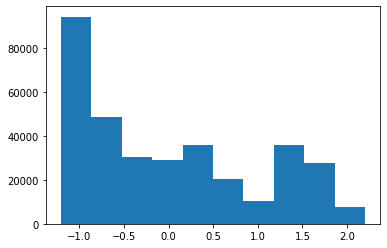

In [24]:
#説明変数の標準化

X = df_fund3[["main_category", "goal", "pledged", "backers", "period"]].values

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
plt.hist(X_std[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）

In [25]:
y = df_fund2["state"].values

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_std)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_std, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]


print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}".format(w0, w1, w2, w3, w4, w5))

w0 = -1.284, w1 = -0.048, w2 = -96.390, w3 = 11.865, w4 = 18.125, w5 = -0.510


In [26]:
# ラベルを予測
y_est = clf.predict(X_std)

# 確率値を得る
y_est_proba = clf.predict_proba(X_std)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -121693.688
対数尤度 = -121689.974
正答率 = 86.338%


In [27]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
conf_mat
#精度が上がった

,予測 = 成功,予測 = 失敗
正解 = 成功,198916,7010
正解 = 失敗,39425,94531


In [30]:
#次に白色化を行う

df_fund4 = df_fund2

X = df_fund4[["main_category", "goal", "pledged", "backers", "period"]].values

#  無相関化を行うための一連の処理
cov = np.cov(X, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
X_decorr = np.dot(S.T, X.T).T #データを無相関化

相関係数: 0.000


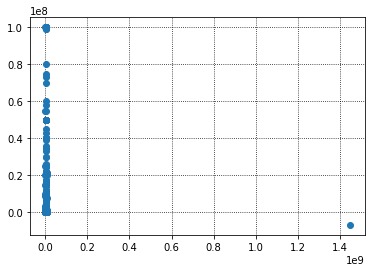

In [31]:
print('相関係数: {:.3f}'.format(np.corrcoef(X_decorr[:, 0], X_decorr[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_decorr[:, 0], X_decorr[:, 1], 'o')
plt.show()

相関係数: 0.000


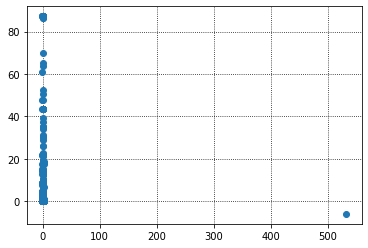

In [32]:
#  白色化を行うための一連の処理
stdsc = StandardScaler()
stdsc.fit(data1_decorr)
X_whitening  = stdsc.transform(X_decorr) # 無相関化したデータに対して、さらに標準化

print('相関係数: {:.3f}'.format(np.corrcoef(X_whitening[:, 0], X_whitening[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_whitening[:, 0], X_whitening[:, 1], 'o')
plt.show()

In [33]:
# ラベルを予測
y_est = clf.predict(X_whitening)

# 確率値を得る
y_est_proba = clf.predict_proba(X_whitening)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -2429281.524
対数尤度 = -2428017.293
正答率 = 52.275%


In [34]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
conf_mat
#精度が下がった

,予測 = 成功,予測 = 失敗
正解 = 成功,93447,112479
正解 = 失敗,49731,84225


In [ ]:
2日目の学習内容を利用して、標準化を行うことで予測精度が上がったことが確かめられた

In [108]:
#ラッパー法を用いたデータ選択

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [110]:

df_fund5 = df_fund
df_fund5 = df_fund5.drop(columns=['ID','name','category','currency','country','deadline','launched','usd pledged'])
df_fund5 = df_fund5[df_fund5['state'] != 'canceled']
#stateがcanceledのものを除外

df_fund5['state']=df_fund5['state'] == 'successful'
df_fund5['period']=df_fund2['period']
df_fund5['main_category']=df_fund2['main_category']


# estimatorにモデルをセット
# 今回は回帰問題であるためLinearRegressionを使用
estimator = LinearRegression(normalize=False)

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_absolute_errorを評価指標に指定（分類ならaccuracy）
rfecv = RFECV(estimator, cv=10, scoring='neg_mean_absolute_error')

In [111]:
df_fund5

,main_category,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,period
0,0,1000.0,0.0,False,0,0.0,1533.95,5140051.0
1,1,30000.0,2421.0,False,15,2421.0,30000.00,5253362.0
2,1,45000.0,220.0,False,3,220.0,45000.00,3973149.0
3,2,5000.0,1.0,False,1,1.0,5000.00,2666148.0
5,3,50000.0,52375.0,True,224,52375.0,50000.00,3061292.0
...,...,...,...,...,...,...,...,...
378654,3,6500.0,154.0,False,4,154.0,6500.00,2598697.0
378657,1,1500.0,155.0,False,5,155.0,1500.00,2406285.0
378658,1,15000.0,20.0,False,1,20.0,15000.00,3989969.0
378659,12,15000.0,200.0,False,6,200.0,15000.00,2699166.0


In [112]:
df_fund5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339882 entries, 0 to 378660
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     339882 non-null  int64  
 1   goal              339882 non-null  float64
 2   pledged           339882 non-null  float64
 3   state             339882 non-null  bool   
 4   backers           339882 non-null  int64  
 5   usd_pledged_real  339882 non-null  float64
 6   usd_goal_real     339882 non-null  float64
 7   period            339882 non-null  float64
dtypes: bool(1), float64(5), int64(2)
memory usage: 21.1 MB


In [113]:
train_label = df_fund5["state"]
train_data = df_fund5.drop("state", axis=1)

y = train_label.values
X = train_data.values

# fitで特徴選択を実行
rfecv.fit(X, y)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=0)

In [114]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[1 1 1 1 1 2 1]


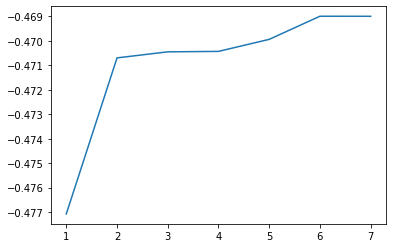

In [115]:
# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [116]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

array([ True,  True,  True,  True,  True, False,  True])

In [117]:
# bool型の配列に ~ をつけるとTrueとFalseを反転させることができる
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

array([False, False, False, False, False,  True, False])

In [118]:
remove_feature = train_data.columns[remove_idx]
remove_feature

Index(['usd_goal_real'], dtype='object')

In [119]:
selected_train_data = train_data.drop(remove_feature, axis=1)
selected_train_data

,main_category,goal,pledged,backers,usd_pledged_real,period
0,0,1000.0,0.0,0,0.0,5140051.0
1,1,30000.0,2421.0,15,2421.0,5253362.0
2,1,45000.0,220.0,3,220.0,3973149.0
3,2,5000.0,1.0,1,1.0,2666148.0
5,3,50000.0,52375.0,224,52375.0,3061292.0
...,...,...,...,...,...,...
378654,3,6500.0,154.0,4,154.0,2598697.0
378657,1,1500.0,155.0,5,155.0,2406285.0
378658,1,15000.0,20.0,1,20.0,3989969.0
378659,12,15000.0,200.0,6,200.0,2699166.0


w0 = -1.265, w1 = -0.050, w2 = -95.749, w3 = 9.193, w4 = 17.094, w5 = 3.882


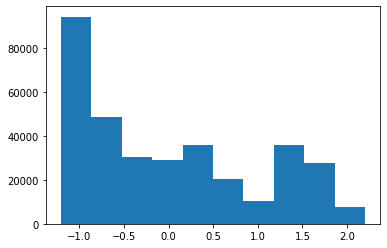

In [120]:
#説明変数の標準化

X = selected_train_data

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
plt.hist(X_std[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）

y = df_fund2["state"].values

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_std)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_std, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]


print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}".format(w0, w1, w2, w3, w4, w5))

In [121]:
# ラベルを予測
y_est = clf.predict(X_std)

# 確率値を得る
y_est_proba = clf.predict_proba(X_std)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -121747.367
対数尤度 = -121743.633
正答率 = 86.298%


In [122]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
conf_mat
#精度がDay2の時より下がった

,予測 = 成功,予測 = 失敗
正解 = 成功,198898,7028
正解 = 失敗,39542,94414


今回main_category,goal,pledged,backersとlauncedとdeadlineから作成したperiodのデータを用いて、
そのデータを標準化してロジスティック回帰を行うことで86.338%の正解率で予測を行うことができた。